In [25]:
#How many people need shelter?
#Prepare dataframe
#Create training and test set
#create model and assess accuracy
#visualize the output
#perform parameter tuning
#also perform cross-validation

In [26]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Prophet

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Prophet


#Directories, Library, and Data

In [27]:
import numpy as np
import pandas as pd
from prophet import Prophet
from prophet.utilities import regressor_coefficients
from prophet.diagnostics import cross_validation

In [28]:
#Load the data
df=pd.read_csv("DHS_Daily_Report_2020.csv")
df.head()

,Date,Total Individuals in Shelter,Easter,Thanksgiving,Christmas,Temperature
0,1/1/2014,50689,0,0,0,2.17
1,1/2/2014,50797,0,0,0,2.51
2,1/3/2014,50954,0,0,0,-6.35
3,1/4/2014,50957,0,0,0,-1.27
4,1/5/2014,50957,0,0,0,7.18


#Data Preparation

In [29]:
#Date variable
df.Date=pd.to_datetime(df.Date,
                       format="%m/%d/%Y")
df.Date

0      2014-01-01
1      2014-01-02
2      2014-01-03
3      2014-01-04
4      2014-01-05
          ...    
2552   2020-12-27
2553   2020-12-28
2554   2020-12-29
2555   2020-12-30
2556   2020-12-31
Name: Date, Length: 2557, dtype: datetime64[ns]

In [30]:
#Renaming variables
df=df.rename(columns={'Date': 'ds','Total Individuals in Shelter': 'y'})
df.head()

,ds,y,Easter,Thanksgiving,Christmas,Temperature
0,2014-01-01,50689,0,0,0,2.17
1,2014-01-02,50797,0,0,0,2.51
2,2014-01-03,50954,0,0,0,-6.35
3,2014-01-04,50957,0,0,0,-1.27
4,2014-01-05,50957,0,0,0,7.18


#Holidays

In [31]:
#Easter
easter_dates=pd.to_datetime(df[df.Easter==1].ds)
easter = pd.DataFrame({'holiday': 'easter',
                       'ds':easter_dates,
                       'lower_window':-3,
                       'upper_window': 4})
easter

,holiday,ds,lower_window,upper_window
109,easter,2014-04-20,-3,4
459,easter,2015-04-05,-3,4
816,easter,2016-03-27,-3,4
1201,easter,2017-04-16,-3,4
1551,easter,2018-04-01,-3,4
1936,easter,2019-04-21,-3,4
2293,easter,2020-04-12,-3,4


In [32]:
#Black Friday dates
thanksgiving_dates=pd.to_datetime(df[df['Thanksgiving']==1].ds)
thanksgiving=pd.DataFrame({'holiday': 'Thanksgiving',
                 'ds':thanksgiving_dates,
                 'lower_window':-7,
                 'upper_window':2})
thanksgiving

,holiday,ds,lower_window,upper_window
330,Thanksgiving,2014-11-27,-7,2
694,Thanksgiving,2015-11-26,-7,2
1058,Thanksgiving,2016-11-24,-7,2
1422,Thanksgiving,2017-11-23,-7,2
1786,Thanksgiving,2018-11-22,-7,2
2157,Thanksgiving,2019-11-28,-7,2
2521,Thanksgiving,2020-11-26,-7,2


In [33]:
#Combine events
holidays=pd.concat([easter,thanksgiving])
holidays

,holiday,ds,lower_window,upper_window
109,easter,2014-04-20,-3,4
459,easter,2015-04-05,-3,4
816,easter,2016-03-27,-3,4
1201,easter,2017-04-16,-3,4
1551,easter,2018-04-01,-3,4
1936,easter,2019-04-21,-3,4
2293,easter,2020-04-12,-3,4
330,Thanksgiving,2014-11-27,-7,2
694,Thanksgiving,2015-11-26,-7,2
1058,Thanksgiving,2016-11-24,-7,2


In [34]:
#Remove events from main dataframe
df=df.drop(columns=['Easter','Thanksgiving'])
df.head()

,ds,y,Christmas,Temperature
0,2014-01-01,50689,0,2.17
1,2014-01-02,50797,0,2.51
2,2014-01-03,50954,0,-6.35
3,2014-01-04,50957,0,-1.27
4,2014-01-05,50957,0,7.18


#Facebook Prophet

In [35]:
#Training and test split
test_days = 31
training_set = df.iloc[:-test_days,:]
test_set = df.iloc[-test_days:,:]
print(test_set.head(2))
print(training_set.tail(2))

             ds      y  Christmas  Temperature
2526 2020-12-01  53686          0        13.47
2527 2020-12-02  53592          0         7.19
             ds      y  Christmas  Temperature
2524 2020-11-29  53708          0        11.21
2525 2020-11-30  53745          0        16.62


In [36]:
#Facebook Prophet Model
m=Prophet(growth='linear',
           yearly_seasonality=True,
           weekly_seasonality=True,
           daily_seasonality=False,
           holidays=holidays,
           seasonality_mode='multiplicative',
           seasonality_prior_scale=10,
           holidays_prior_scale=10,
           changepoint_prior_scale=0.05)
m.add_regressor('Christmas')
m.add_regressor('Temperature')
m.fit(training_set)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphgw4devb/lctd8n63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphgw4devb/_l7w2vmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20252', 'data', 'file=/tmp/tmphgw4devb/lctd8n63.json', 'init=/tmp/tmphgw4devb/_l7w2vmr.json', 'output', 'file=/tmp/tmphgw4devb/prophet_model248jxj0q/prophet_model-20230826075126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
#Coefficient Regressor
from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Christmas,multiplicative,0.000000,-0.000145,-0.000145,-0.000145
1,Temperature,multiplicative,14.960234,-0.000187,-0.000187,-0.000187


#Accuracy Assessment

In [38]:
#Create a future dataframe
future=m.make_future_dataframe(periods=test_days,
                               freq='D')
future=pd.concat([future,df.iloc[:,2:]], axis=1)
future.head(5)

,ds,Christmas,Temperature
0,2014-01-01,0,2.17
1,2014-01-02,0,2.51
2,2014-01-03,0,-6.35
3,2014-01-04,0,-1.27
4,2014-01-05,0,7.18


In [39]:
#Forecasting
#yhat are the predictions
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Temperature,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,50048.496045,50439.102378,51203.322038,50048.496045,50048.496045,0.0,0.0,0.0,0.002388,...,0.000730,0.000730,0.000730,0.012663,0.012663,0.012663,0.0,0.0,0.0,50838.313334
1,2014-01-02,50069.860122,50486.088552,51225.812224,50069.860122,50069.860122,0.0,0.0,0.0,0.002324,...,0.000621,0.000621,0.000621,0.012827,0.012827,0.012827,0.0,0.0,0.0,50859.598227
2,2014-01-03,50091.224200,50507.142198,51280.685241,50091.224200,50091.224200,0.0,0.0,0.0,0.003979,...,-0.000885,-0.000885,-0.000885,0.013057,0.013057,0.013057,0.0,0.0,0.0,50900.226054
3,2014-01-04,50112.588277,50464.656731,51252.673213,50112.588277,50112.588277,0.0,0.0,0.0,0.003030,...,-0.001559,-0.001559,-0.001559,0.013350,0.013350,0.013350,0.0,0.0,0.0,50855.315915
4,2014-01-05,50133.952354,50507.267054,51268.516603,50133.952354,50133.952354,0.0,0.0,0.0,0.001453,...,0.000147,0.000147,0.000147,0.013704,0.013704,0.013704,0.0,0.0,0.0,50901.187381


In [40]:
#Retrieve predictions
predictions = forecast.yhat[-test_days:]
predictions[:2]

2526    54925.416103
2527    55029.968144
Name: yhat, dtype: float64

In [41]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(test_set['y'], predictions))
print(np.sqrt(mean_squared_error(test_set['y'],predictions)))

1326.7321779652877
1333.0192312624847


#Visualization

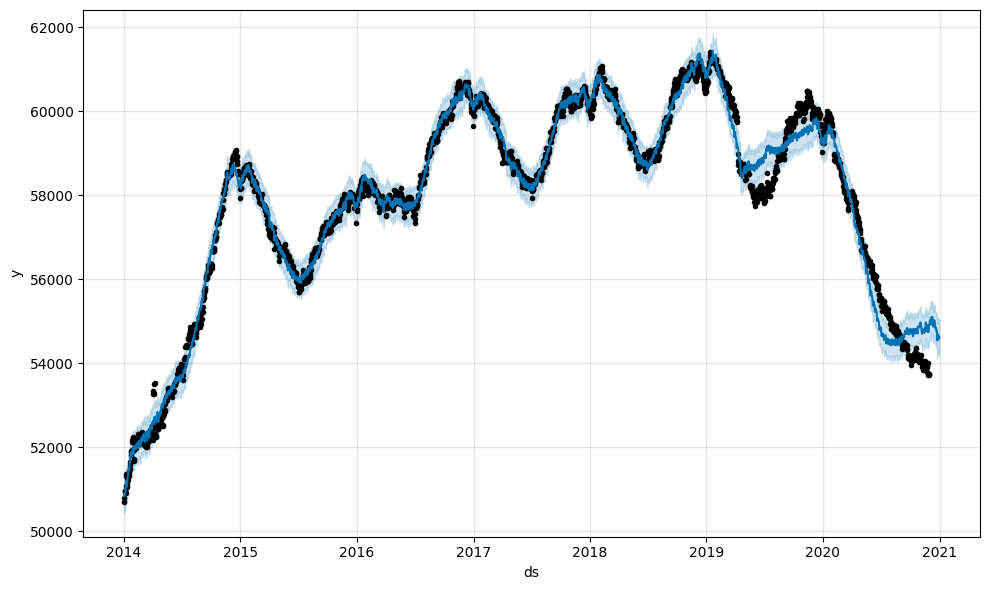

In [42]:
#Forecast
m.plot(forecast);

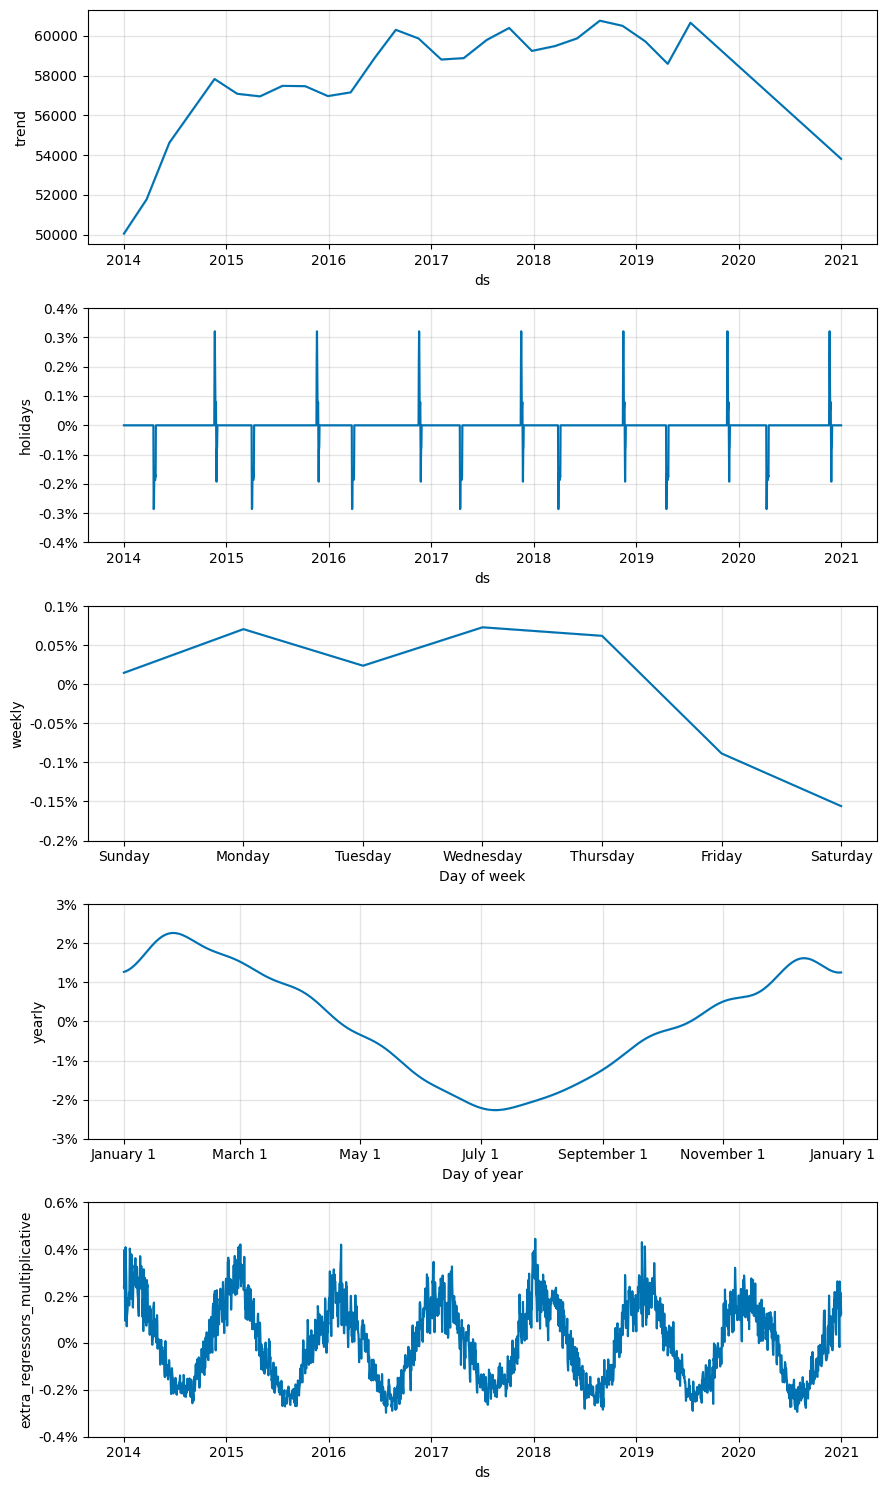

In [43]:
#plot components
m.plot_components(forecast);

#Cross-validation

In [44]:
#CV
from prophet.diagnostics import cross_validation
df_cv=cross_validation(model=m,
                       horizon='31 days',
                       initial='1500 days',
                       parallel= "processes")
df_cv.head()

INFO:prophet:Making 65 forecasts with cutoffs between 2018-02-11 00:00:00 and 2020-10-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7feb255cea70>
DEBUG:cmdstanpy:input tempfile: /tmp/tmphgw4devb/oe5b8vag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphgw4devb/2an35qma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphgw4devb/1tcrhj0q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphgw4devb/_nh8ntau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63151', 'data', 'file=/tmp/tmphgw4devb/2an35qma.json', 'init=/tmp/tmphgw4devb/_nh8ntau.json', 'output', 'file=/tmp/tmphgw4devb/prophet_modeld42m4b_1/prophet_model-20230826075132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:CmdStan args

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-02-12,60714.198881,60547.872566,60882.649269,60754,2018-02-11
1,2018-02-13,60688.824896,60506.313328,60864.503300,60760,2018-02-11
2,2018-02-14,60688.627263,60501.817134,60859.733229,60755,2018-02-11
3,2018-02-15,60667.703824,60484.558792,60834.587449,60775,2018-02-11
4,2018-02-16,60563.487865,60395.065404,60730.855078,60593,2018-02-11


In [45]:
#Measure the error
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(df_cv['y'],df_cv['yhat']))
print(np.sqrt(mean_squared_error(df_cv['y'],df_cv['yhat'])))

496.7959568958943
772.895691481392


#Parameter Tuning

In [46]:
#Grid
from sklearn.model_selection import ParameterGrid
param_grid={'seasonality_prior_scale':[5,10,20],
            'holidays_prior_scale':[5,10,20],
            'changepoint_prior_scale':[0.01,0.05,0.1]}
grid=ParameterGrid(param_grid)
list(grid)[:3]

[{'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 5,
  'seasonality_prior_scale': 5},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 5,
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 5,
  'seasonality_prior_scale': 20}]

In [47]:
#Hyperparameter
rmse=[]
#Parameter tuning loop
for params in grid:
  #model
  m=Prophet(growth='linear',
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative',
            seasonality_prior_scale=params['seasonality_prior_scale'],
            holidays_prior_scale=params['holidays_prior_scale'],
            changepoint_prior_scale=params['changepoint_prior_scale'])
  m.add_regressor('Christmas')
  m.fit(training_set)
  #Cross-validation
  df_cv=cross_validation(model=m, horizon='31 days',
                         initial='2300 days',
                         parallel="processes")
  #Get the error
  error=np.sqrt(mean_squared_error(df_cv['y'],df_cv['yhat']))
  #Store the results
  rmse.append(error)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphgw4devb/vft8pni_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphgw4devb/r69bj406.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6265', 'data', 'file=/tmp/tmphgw4devb/vft8pni_.json', 'init=/tmp/tmphgw4devb/r69bj406.json', 'output', 'file=/tmp/tmphgw4devb/prophet_modelsp7_kkah/prophet_model-20230826075422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:54:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:54:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 13 forecasts with cutoffs between 2020-04-27 00:00:00 and 2020-10-30 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7feb1f33d0c0>
DEBUG:cmdstanpy:input tempfile: 

In [48]:
#Finding how many observations
training_set.shape

(2526, 4)

In [49]:
#Finding the best params
best_params=grid[np.argmin(rmse)]
print(best_params)

{'seasonality_prior_scale': 10, 'holidays_prior_scale': 10, 'changepoint_prior_scale': 0.1}
